## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = combined_df[combined_df["Mouse ID"].duplicated()]

print(duplicated["Mouse ID"].unique())

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b487' 'b559' 'b759' 'b879' 'c139'
 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766' 'c819'
 'c832' 'c895' 'c927' 'd164' 'd474' 'e213' 'e227' 'e291' 'e476' 'e584'
 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f993' 'g107' 'g296'
 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333' 'h531' 'i386' 'i477'
 'i635' 'i669' 'i901' 'j235' 'j296' 'j365' 'j755' 'j984' 'k210' 'k382'
 'k483' 'k510' 'k603' 'k754' 'k804' 'k862' 'k894' 'l215' 'l264' 'l471'
 'l490' 'l558' 'l661' 'l700' 'l725' 'l733' 'm133' 'm269' 'm331' 'm550'
 'm650

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
data_df = combined_df.set_index(['Mouse ID', 'Timepoint'])
data_df.head(15)

Drug Regimen     Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                                
k403     0             Ramicane    Male          21          16   
         5             Ramicane    Male          21          16   
         10            Ramicane    Male          21          16   
         15            Ramicane    Male          21          16   
         20            Ramicane    Male          21          16   
         25            Ramicane    Male          21          16   
         30            Ramicane    Male          21          16   
         35            Ramicane    Male          21          16   
         40            Ramicane    Male          21          16   
         45            Ramicane    Male          21          16   
s185     0            Capomulin  Female           3          17   
         5            Capomulin  Female           3          17   
         10           Capomulin  Female           3          17   
         15           Capomulin  Female           3          17   
         20           Capomulin  Female           3          17   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
k403     0                   45.000000                 0  
         5                   38.825898                 0  
         10                  35.014271                 1  
         15                  34.223992                 1  
         20                  32.997729                 1  
         25                  33.464577                 1  
         30                  31.099498                 1  
         35                  26.546993                 1  
         40                  24.365505                 1  
         45                  22.050126                 1  
s185     0                   45.000000                 0  
         5                   43.878496                 0  
         10                  37.614948                 0  
         15                  38.177232                 0  
         20                  36.866876                 0

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#### sorting by timepoint to use later on Quartiles, Outliers and Boxplots
combined_df.sort_values("Timepoint")

### downsampling data frame to keep last value/greatest timepoint
clean_df_last = combined_df.drop_duplicates(subset=["Mouse ID"], keep="last")
clean_df_last.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df_last["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



# group by and function all the things
tumor_mean = combined_df.groupby("Drug Regimen").mean()
tumor_median = combined_df.groupby("Drug Regimen").median()
tumor_variance = combined_df.groupby("Drug Regimen").var()
tumor_SD = combined_df.groupby("Drug Regimen").std()
tumor_SEM = combined_df.groupby("Drug Regimen").sem()

# makes drug regs an array
drug_reg = combined_df["Drug Regimen"].unique()


tumor_sum_df = pd.DataFrame({"Tumor Means": tumor_mean["Tumor Volume (mm3)"],
                            "Tumor Medians": tumor_median["Tumor Volume (mm3)"],
                            "Tumor Variances": tumor_variance["Tumor Volume (mm3)"],
                            "Tumor Standard Definitions": tumor_SD["Tumor Volume (mm3)"],
                            "Tumor SEM": tumor_SEM["Tumor Volume (mm3)"],
                            })


tumor_sum_df


,Tumor Means,Tumor Medians,Tumor Variances,Tumor Standard Definitions,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#agg the heck out of it yay
agg_df = combined_df.groupby(["Drug Regimen"]).agg(Tumor_Means=("Tumor Volume (mm3)",np.mean), 
                                                   Tumor_Medians=("Tumor Volume (mm3)",np.median),
                                                   Tumor_Variances=("Tumor Volume (mm3)",np.var),
                                                   Tumor_Standard_Definitions=("Tumor Volume (mm3)",np.std),
                                                   Tumor_SEMs=("Tumor Volume (mm3)",st.sem))
agg_df

,Tumor_Means,Tumor_Medians,Tumor_Variances,Tumor_Standard_Definitions,Tumor_SEMs
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.



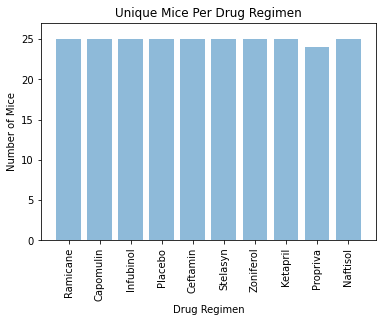

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# make group by DF for unique mice count
drug_unique_mice_DF = clean_df_last.groupby("Drug Regimen").count()
count_mice = drug_unique_mice_DF["Mouse ID"]

x_axis = np.arange(len(count_mice))

plt.bar(x_axis, count_mice, alpha=0.5, align="center")

plt.title("Unique Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

# add ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_reg, rotation=90)

# add y lim
plt.ylim(0, max(count_mice)+2)

plt.show()

/opt/anaconda3/envs/pythonUCI/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


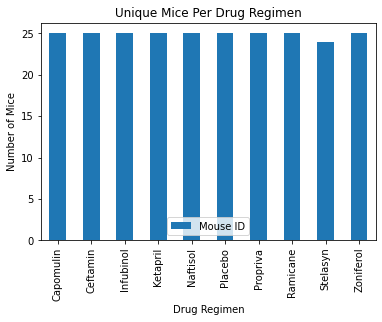

In [10]:
#bar plot using pandas (as per HW instructions BUT NOT IN THE STARTER INSTRUCTIONS...yay double checking)
plot = drug_unique_mice_DF.plot.bar(y='Mouse ID')
plt.title("Unique Mice Per Drug Regimen")

plt.axes().set_ylabel('Number of Mice')
plt.show()

/opt/anaconda3/envs/pythonUCI/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


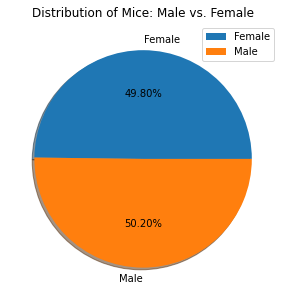

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# make group by DF for unique mice count
sex_mice_df = clean_df_last.groupby("Sex").count()

plot = sex_mice_df.plot.pie(y='Mouse ID', autopct='%.2f%%', figsize=(5, 5), shadow=True)
plt.title("Distribution of Mice: Male vs. Female")

plt.axes().set_ylabel('')
plt.show()

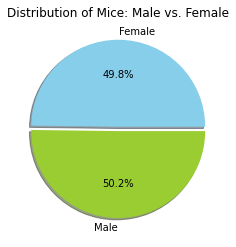

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels = ["Female", "Male"]
size = sex_mice_df["Mouse ID"]
explode = (0.05, 0)

plt.pie(size, explode=explode, labels=labels, colors=["skyblue", "yellowgreen"],
        autopct="%1.1f%%", shadow=True)

plt.title("Distribution of Mice: Male vs. Female")



plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


#### ALREADY DID THIS ABOVE see note on clean_df_last. Below is just making it a cleaner but deleting columns
tumor_volume_df = clean_df_last[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

tumor_volume_df = tumor_volume_df.set_index("Drug Regimen")
tumor_vol_clean = tumor_volume_df.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]


reset_tumor_vol = tumor_vol_clean.reset_index()

print(f"tumor_vol_clean \n{tumor_vol_clean.head()}")
print("\n")
print(f"reset_tumor_vol \n{reset_tumor_vol.head()}")



tumor_vol_clean 
             Mouse ID  Timepoint  Tumor Volume (mm3)
Drug Regimen                                        
Capomulin        s185         45           23.343598
Capomulin        x401         45           28.484033
Capomulin        m601         45           28.430964
Capomulin        f966         20           30.485985
Capomulin        u364         45           31.023923


reset_tumor_vol 
  Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)
0    Capomulin     s185         45           23.343598
1    Capomulin     x401         45           28.484033
2    Capomulin     m601         45           28.430964
3    Capomulin     f966         20           30.485985
4    Capomulin     u364         45           31.023923


In [14]:
#Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    find_drug = reset_tumor_vol.loc[reset_tumor_vol["Drug Regimen"] == treatment, ["Tumor Volume (mm3)"]]  
    tumor_vol = reset_tumor_vol["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(find_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = find_drug["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
        
    print(f"For {treatment}:\n")
    print(f"The interquartile range is: {iqr:.2f}.")
    print(f"The the median is: {quartiles[0.5]:.2f}.")
    print(f"The lower quartile of {treatment} is: {lowerq:.2f}.")
    print(f"The upper quartile of {treatment} is: {upperq:.2f}.")
    print(f"Values below {lower_bound:.2f} could be outliers.")
    print(f"Values above {upper_bound:.2f} could be outliers.")
    for value in find_drug["Tumor Volume (mm3)"]:
        if (value < lower_bound):
            print(f"Outlier is {value:.2f}.")
        elif (value > upper_bound):
            print(f"Outlier is {value:.2f}.")
        else:
            pass

    print("---------------------------------------------\n")

For Capomulin:

The interquartile range is: 7.78.
The the median is: 38.13.
The lower quartile of Capomulin is: 32.38.
The upper quartile of Capomulin is: 40.16.
Values below 20.70 could be outliers.
Values above 51.83 could be outliers.
---------------------------------------------

For Ramicane:

The interquartile range is: 9.10.
The the median is: 36.56.
The lower quartile of Ramicane is: 31.56.
The upper quartile of Ramicane is: 40.66.
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
---------------------------------------------

For Infubinol:

The interquartile range is: 11.48.
The the median is: 60.17.
The lower quartile of Infubinol is: 54.05.
The upper quartile of Infubinol is: 65.53.
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
Outlier is 36.32.
---------------------------------------------

For Ceftamin:

The interquartile range is: 15.58.
The the median is: 59.85.
The lower quartile of Ceftamin is: 48.72.
The upper q

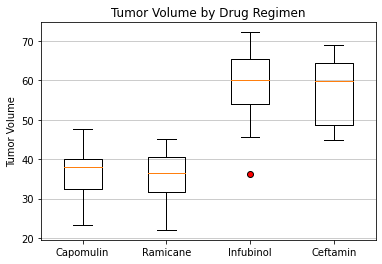

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


Capomulin_plot = tumor_vol_clean[tumor_vol_clean.index =="Capomulin"]["Tumor Volume (mm3)"]
Ramicane_plot = tumor_vol_clean[tumor_vol_clean.index =="Ramicane"]["Tumor Volume (mm3)"]
Infubinol_plot = tumor_vol_clean[tumor_vol_clean.index =="Infubinol"]["Tumor Volume (mm3)"]
Ceftamin_plot = tumor_vol_clean[tumor_vol_clean.index =="Ceftamin"]["Tumor Volume (mm3)"]

flierprops = dict(markerfacecolor='red')

fig1, ax1 = plt.subplots()
box_plot = ax1.boxplot([Capomulin_plot, Ramicane_plot, Infubinol_plot, Ceftamin_plot], 
            labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],
            flierprops=flierprops)
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
ax1.set_axisbelow(True)
plt.show()

## Line and Scatter Plots

In [16]:
# EXTRA CELL YOU PUT IN


# CREATED Capomulin DF
capomulin_df = combined_df[combined_df["Drug Regimen"].str.contains("Capomulin", case=False)]
capomulin_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


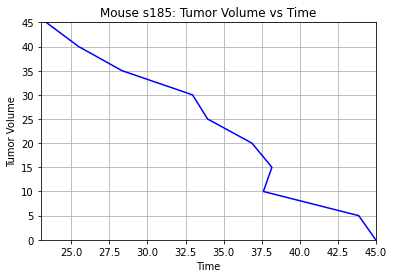

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# ONE MOUSE ONLY s185


mouse_s185_df = capomulin_df.loc[capomulin_df['Mouse ID'] =='s185']
tumor_volume_s185 = mouse_s185_df["Tumor Volume (mm3)"]
time_s185 = mouse_s185_df["Timepoint"]

plt.plot(tumor_volume_s185, time_s185, color="blue")
plt.title("Mouse s185: Tumor Volume vs Time")
plt.xlabel("Time")
plt.ylabel("Tumor Volume")
plt.grid(True)
plt.xlim(23, 45)
plt.ylim(0,45)


plt.show()


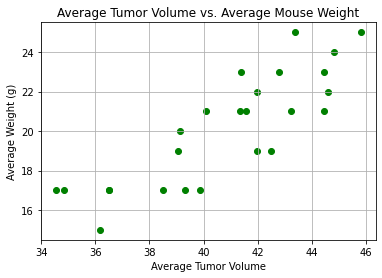

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# DO BOTH AVERAGES

capomulin_agg = capomulin_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)": ["mean"], 
                                                "Weight (g)": ["mean"]})

tumor_avg = capomulin_agg['Tumor Volume (mm3)']
weight_avg = capomulin_agg['Weight (g)']

plt.scatter(tumor_avg, weight_avg, color="green")

plt.xlabel("Average Tumor Volume")
plt.ylabel("Average Weight (g)")
plt.title("Average Tumor Volume vs. Average Mouse Weight")
plt.grid(True)
plt.show()



## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [20]:
tumor_avg_array = capomulin_agg.iloc[:,0]
weight_avg_array = capomulin_agg.iloc[:,1]

correlation = st.pearsonr(tumor_avg_array, weight_avg_array)
print(f"The correlation between average weight and tumor volume is {round(correlation[0],2)}")

The correlation between average weight and tumor volume is 0.84


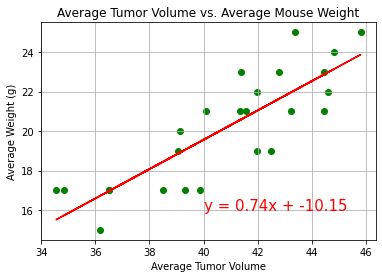

In [21]:
# plot scatter again
plt.scatter(tumor_avg_array, weight_avg_array, color="green")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Average Weight (g)")
plt.title("Average Tumor Volume vs. Average Mouse Weight")
plt.grid(True)

# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tumor_avg_array, weight_avg_array)

# regress - takes x * slope + intercept
regress_values = tumor_avg_array * slope + intercept


#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(tumor_avg_array,regress_values,"r-")
plt.annotate(line_eq,(40,16),fontsize=15,color="red")

plt.show()

In [22]:
#Look across all previously generated figures and tables and write at least three observations 
# or inferences that can be made from the data. Include these observations at the top of notebook.

# Observation 1: Weight has some barring on how big the tumor grew. For the most part, if the mouse was larger, the tumor was also larger
# Observation 2: Based on the box plot, Ramicane wsa the most successful drug with the lowest median and lower quartlie. The upper quartlie is a hair over Capomulin's upper quartlie.
# Observation 3: For Capomulin mouse s185, the point where the drug started to take the most drastic effective turn was at the 30 mark.
